<a href="https://www.kaggle.com/code/ahmednasser1601/human-face-segmentation?scriptVersionId=147254009" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-5cn0d2ja
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-5cn0d2ja
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit e6b339b84b22e8dbf05c9d51a7b232a505fe5a16
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-27j85imq/groundingdino_ae18d975313143c1a335e9cb1f1b29ec
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-27j85imq/groundingdino_ae18d975313143c1a335e9cb1f1b29ec
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 60d796825e1266e56f7e4e9e00e88de662b67bd3
  Preparing metadata (setup.py) ... - done
  Cloning ht

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance, ImageOps
from lang_sam import LangSAM

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def Segment(model, img, img_title):
    masks, boxes, phrases, logits = model.predict(img, "face and hair and cheek and eye and eyebrow and ear and earring and nose and mouth")

    if all(phrase in phrases for phrase in ["face", "hair", "cheek", "eye", "nose", "mouth"]):
        combined_mask = np.ones_like(np.array(img)) * 255
        for mask in masks:
            mask = mask.squeeze().cpu().numpy()
            combined_mask[mask > 0] = np.array(img)[mask > 0]
        return combined_mask, phrases
    else:
        return None, ('\t' + img_title + ': Try Another Image')

In [4]:
def Display(img1, img2, img_title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(img1)
    ax1.set_title('Original')
    ax1.axis('off')

    ax2.imshow(img2)
    ax2.set_title('Segmented')
    ax2.axis('off')

    plt.suptitle(('Image: ' + img_title), fontsize=16)
    plt.show()

In [5]:
model = LangSAM()

input_folder = '/kaggle/input/segmentation'
output_folder = '/kaggle/working'

/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:10<00:00, 255MB/s]


/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:909: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


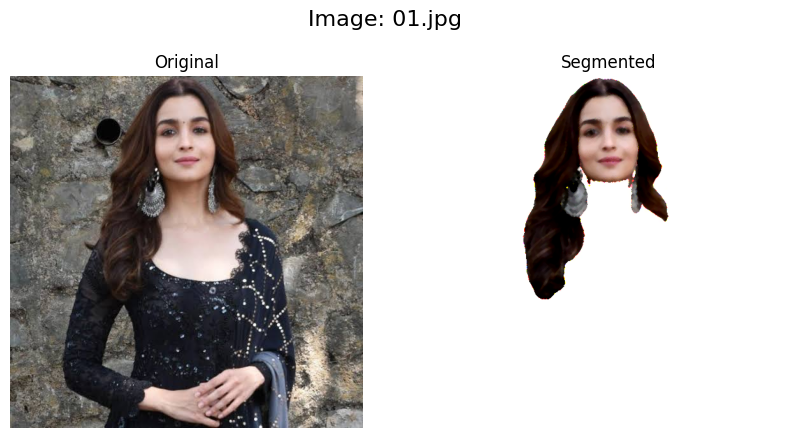

['mouth', 'face', 'earring', 'earring', 'eye', 'eyebrow', 'eyebrow', 'nose', 'eyebrow', 'hair', 'eye', 'cheek'] 
 ____________________________________________________________________________________________________ 



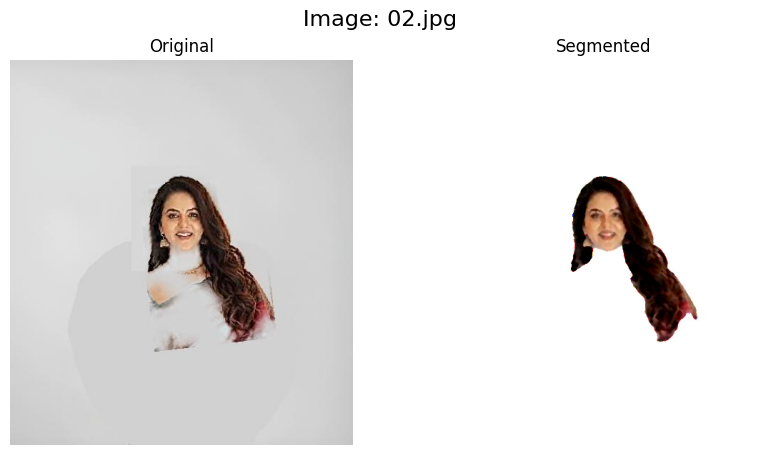

['mouth', 'face', 'eyebrow', 'earring', 'hair', 'nose', 'eyebrow', 'eye', 'eye', 'eyebrow', 'ear', 'eye', 'cheek'] 
 ____________________________________________________________________________________________________ 



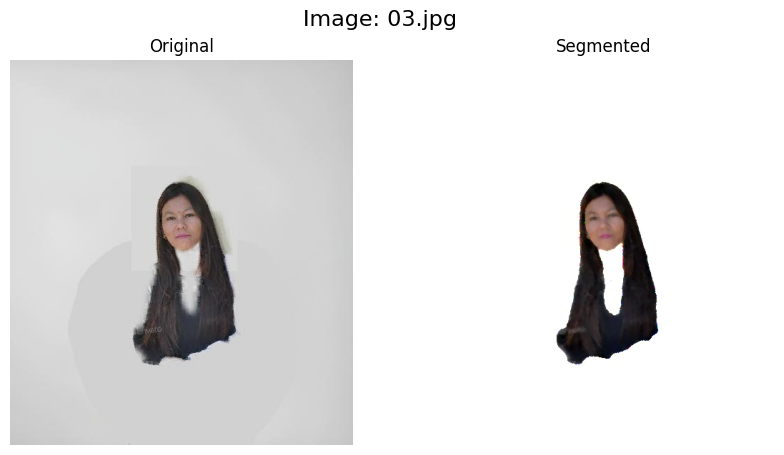

['mouth', 'nose', 'face', 'eye', 'hair', 'eye', 'earring', 'eyebrow', 'eye', 'face', 'ear', 'cheek', 'eyebrow'] 
 ____________________________________________________________________________________________________ 



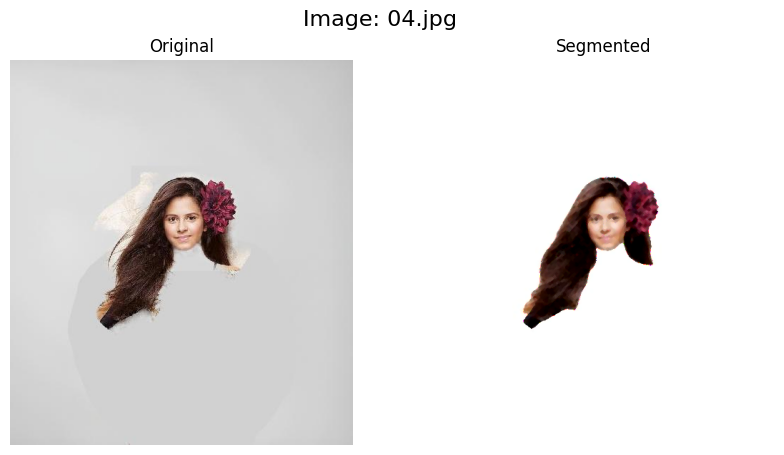

['mouth', 'face', 'hair', 'nose', 'eye', 'ear', 'eye', 'eye', 'cheek', 'eyebrow'] 
 ____________________________________________________________________________________________________ 



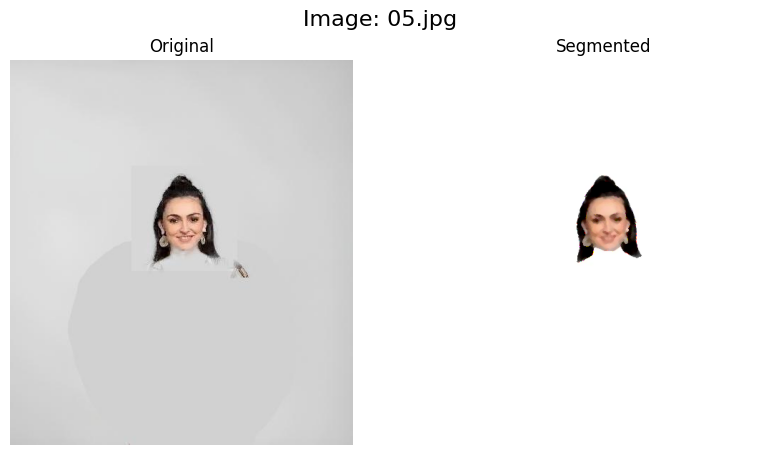

['mouth', 'earring', 'nose', 'face', 'eye', 'ear', 'ear', 'hair', 'earring', 'eye', 'eyebrow', 'face', 'eye', 'face', 'eyebrow', 'eyebrow', 'cheek'] 
 ____________________________________________________________________________________________________ 



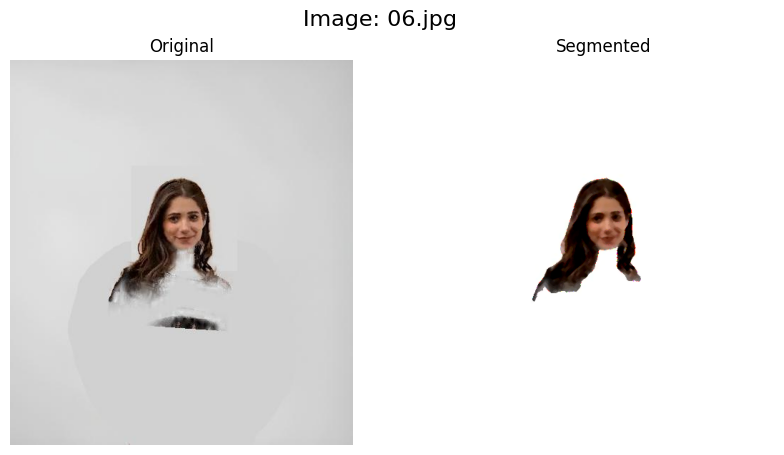

['face', 'mouth', 'nose', 'ear', 'hair', 'ear', 'eye', 'eye', 'eyebrow', 'eye', 'eyebrow', 'earring', 'cheek'] 
 ____________________________________________________________________________________________________ 



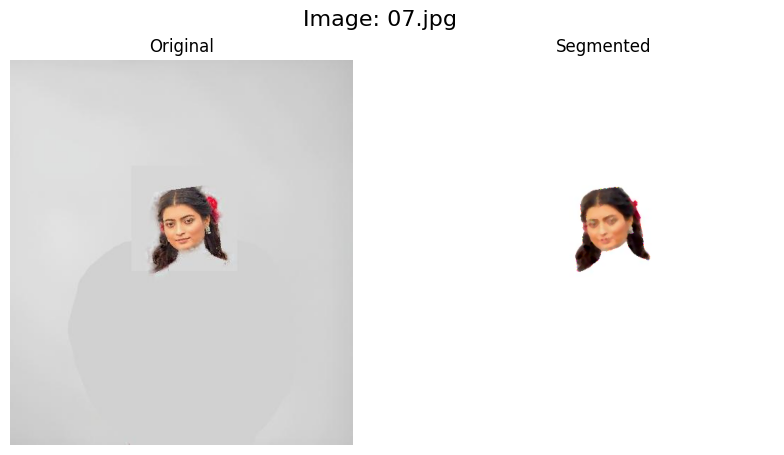

['mouth', 'earring', 'face', 'ear', 'nose', 'eyebrow', 'hair', 'face', 'eye', 'eye', 'eye', 'cheek'] 
 ____________________________________________________________________________________________________ 



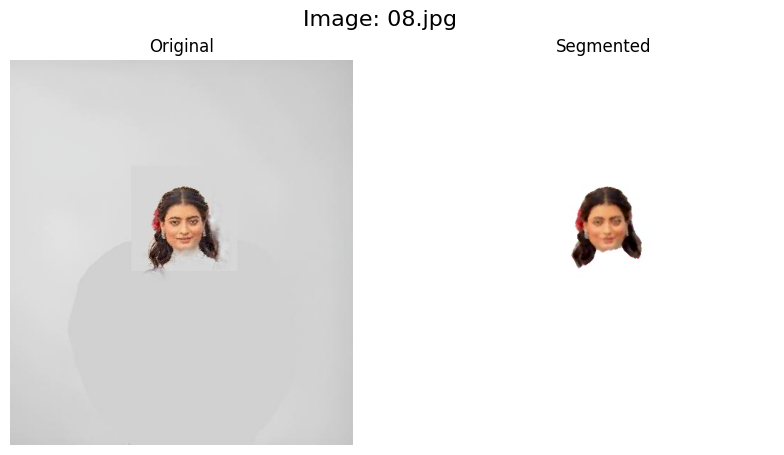

['mouth', 'face', 'face', 'eye', 'nose', 'ear', 'eye', 'earring', 'eye eyebrow', 'hair', 'cheek', 'earring', 'eyebrow'] 
 ____________________________________________________________________________________________________ 



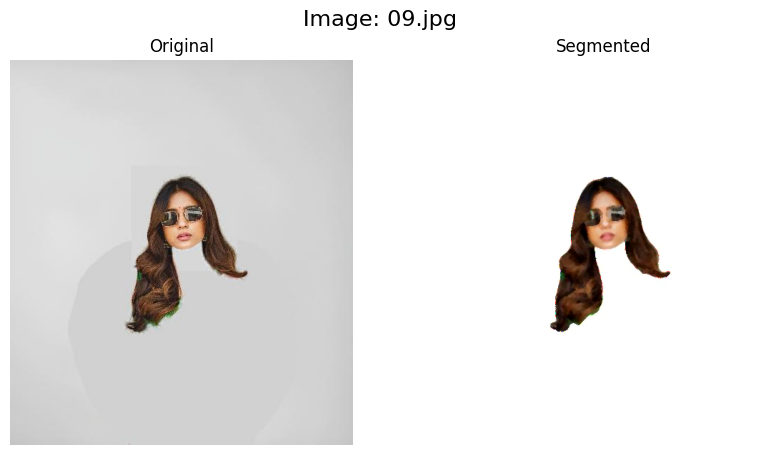

['mouth', 'face', 'eye', 'nose', 'earring', 'hair', 'earring', 'face', 'eyebrow', 'cheek'] 
 ____________________________________________________________________________________________________ 



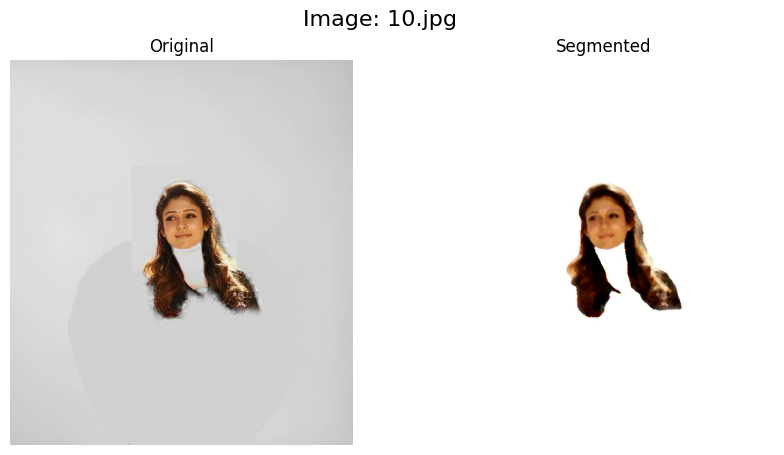

['mouth', 'nose', 'face', 'eye', 'ear', 'hair', 'eye', 'eye', 'eyebrow', 'face', 'earring', 'ear', 'cheek', 'face'] 
 ____________________________________________________________________________________________________ 



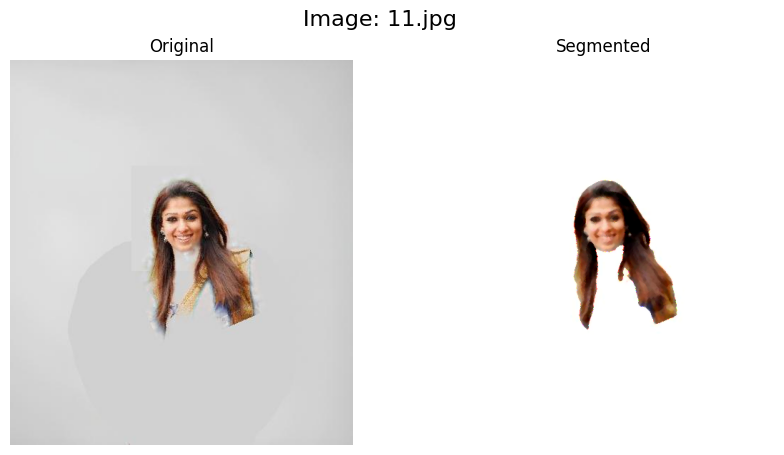

['mouth', 'face', 'eye', 'nose', 'hair', 'eyebrow', 'eye', 'earring', 'eye', 'earring', 'cheek', 'face'] 
 ____________________________________________________________________________________________________ 



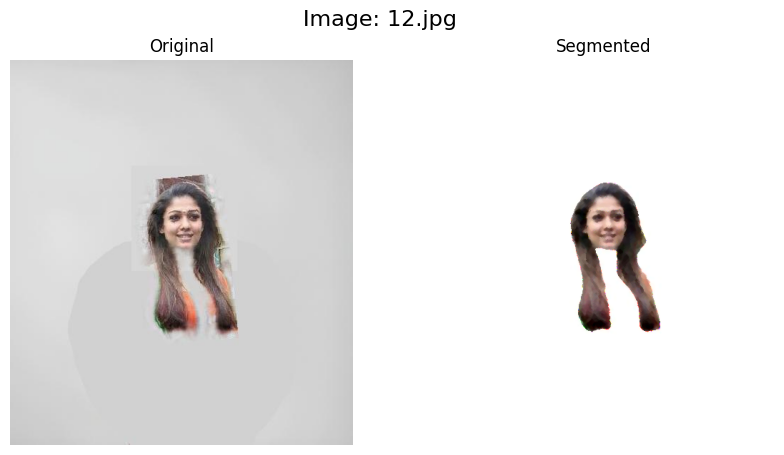

['mouth', 'nose', 'face', 'eyebrow', 'eye', 'eye', 'hair', 'ear', 'eye', 'face', 'cheek'] 
 ____________________________________________________________________________________________________ 



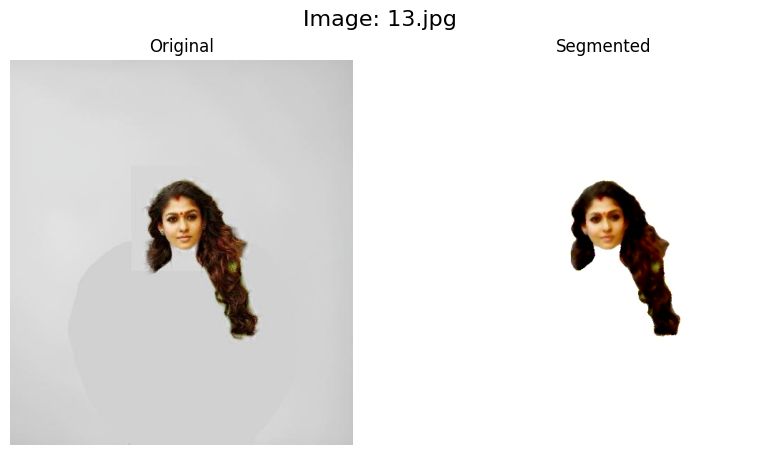

['mouth', 'face', 'hair', 'ear', 'earring', 'eyebrow', 'nose', 'eye', 'eye', 'eye', 'cheek', 'eyebrow'] 
 ____________________________________________________________________________________________________ 



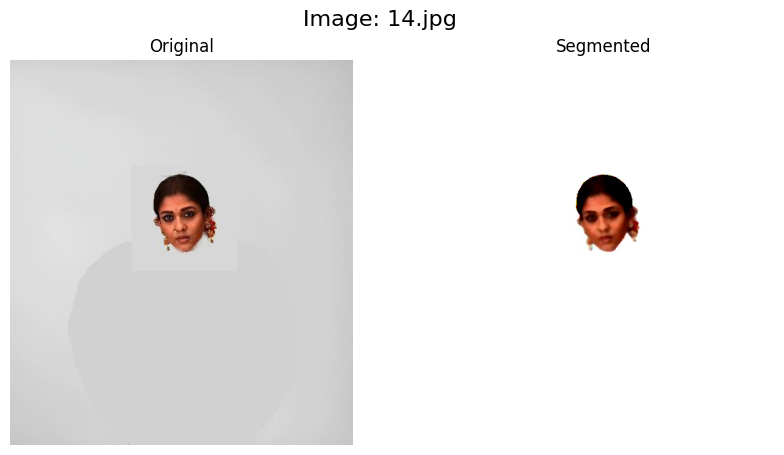

['mouth', 'face', 'hair', 'eye', 'ear earring', 'nose', 'eye', 'eyebrow', 'eye', 'eyebrow', 'earring', 'eyebrow', 'cheek'] 
 ____________________________________________________________________________________________________ 



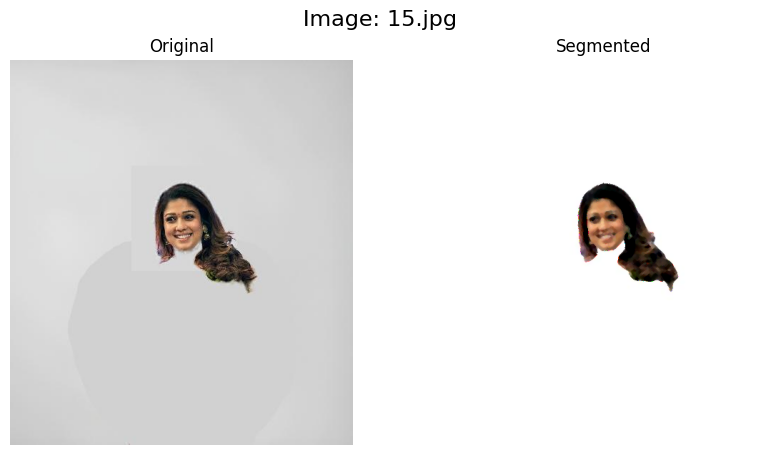

['mouth', 'face', 'earring', 'hair', 'nose', 'eye', 'eye', 'eye', 'face', 'cheek', 'ear', 'eyebrow', 'eyebrow'] 
 ____________________________________________________________________________________________________ 

	16.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



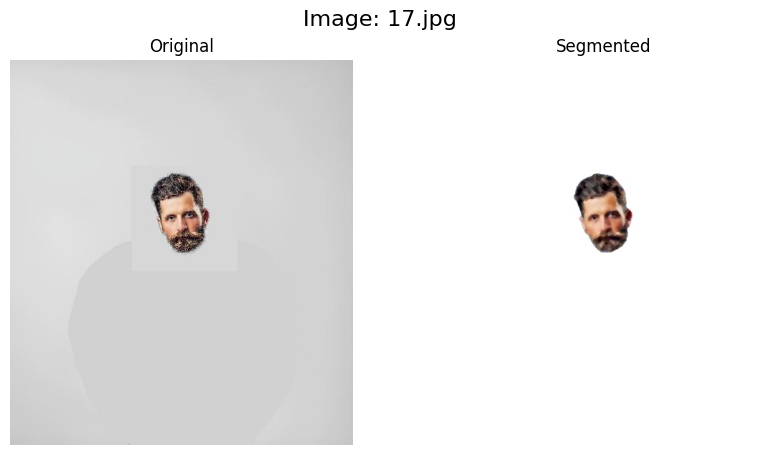

['face', 'hair', 'mouth', 'nose', 'ear', 'eye', 'eye', 'ear', 'eye', 'earring', 'cheek'] 
 ____________________________________________________________________________________________________ 



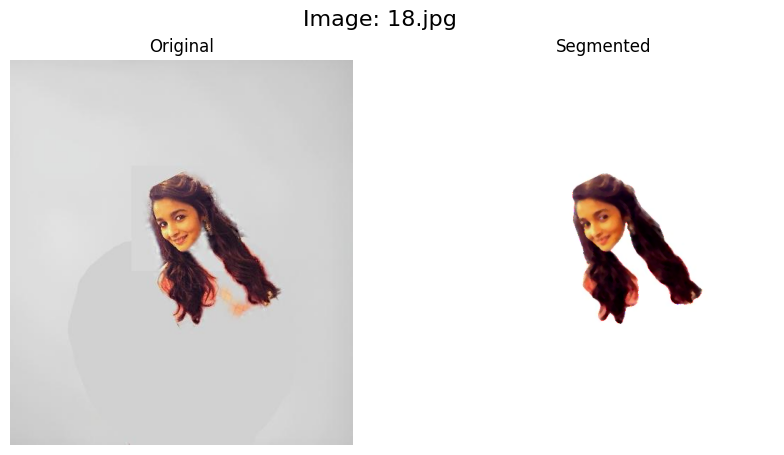

['mouth', 'face', 'nose', 'earring', 'hair', 'eye', 'eye', 'eye', 'eyebrow', 'cheek', 'face'] 
 ____________________________________________________________________________________________________ 



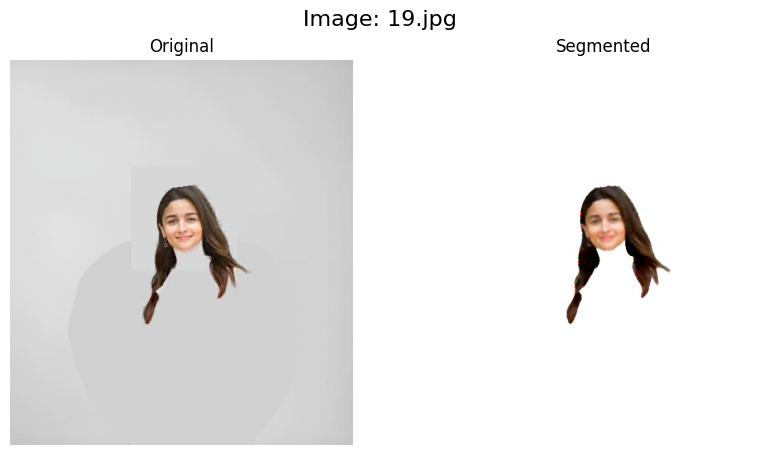

['mouth', 'nose', 'face', 'earring', 'ear', 'eye', 'hair', 'eyebrow', 'eye', 'face', 'eye eyebrow', 'eyebrow', 'cheek'] 
 ____________________________________________________________________________________________________ 



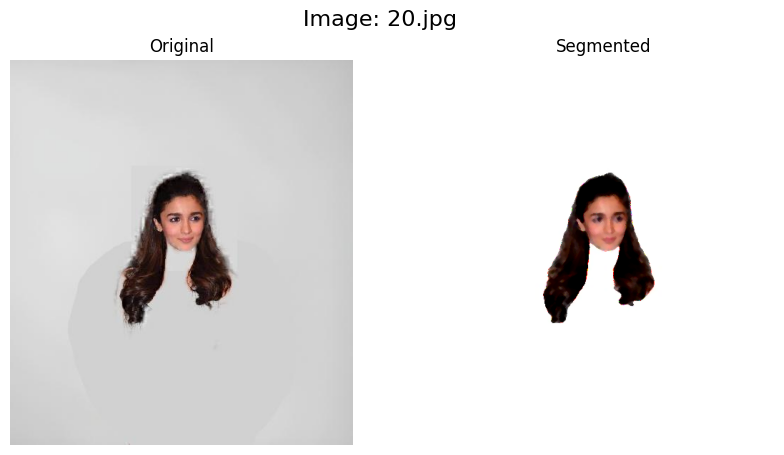

['mouth', 'ear', 'nose', 'face', 'hair', 'eye', 'eye', 'earring', 'eyebrow', 'eyebrow', 'eyebrow', 'eye', 'cheek', 'face'] 
 ____________________________________________________________________________________________________ 



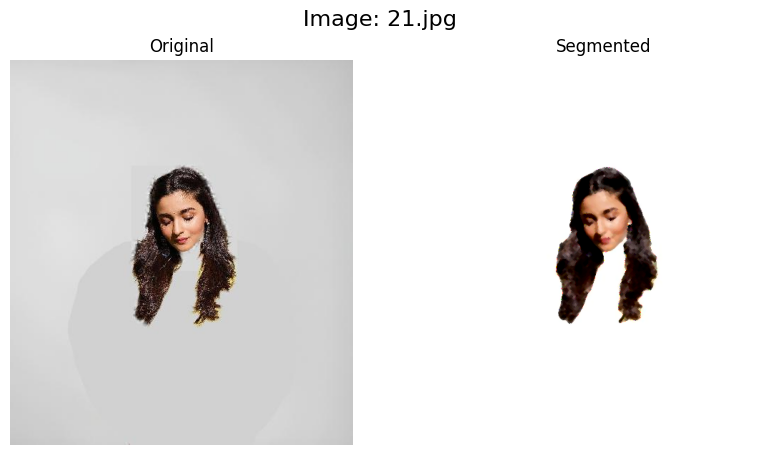

['mouth', 'face', 'hair', 'eyebrow', 'nose', 'eye', 'eye', 'eyebrow', 'cheek', 'face'] 
 ____________________________________________________________________________________________________ 



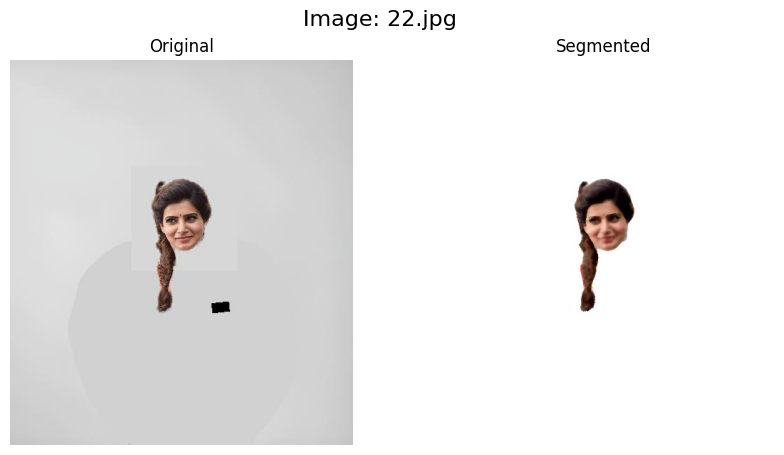

['mouth', 'face', 'nose', 'eye', 'ear', 'eye', 'face', 'eye', 'earring', 'eyebrow', 'hair', 'ear', 'face', 'cheek'] 
 ____________________________________________________________________________________________________ 



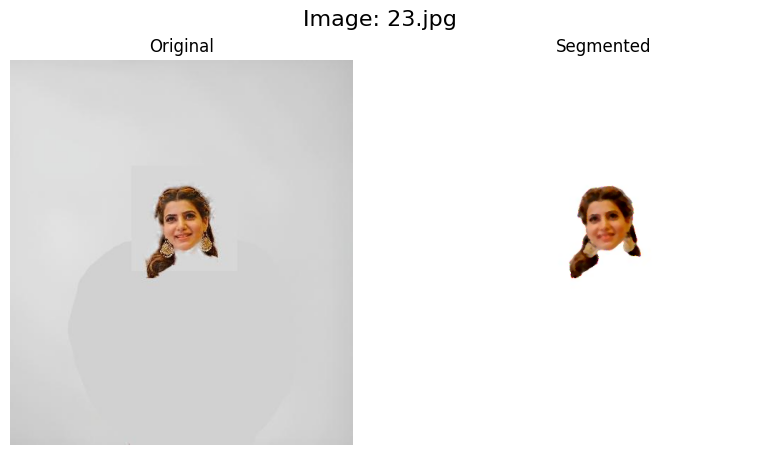

['mouth', 'ear', 'earring', 'face', 'eye', 'nose', 'eye', 'earring', 'eye', 'face', 'hair', 'eyebrow', 'eyebrow', 'cheek'] 
 ____________________________________________________________________________________________________ 



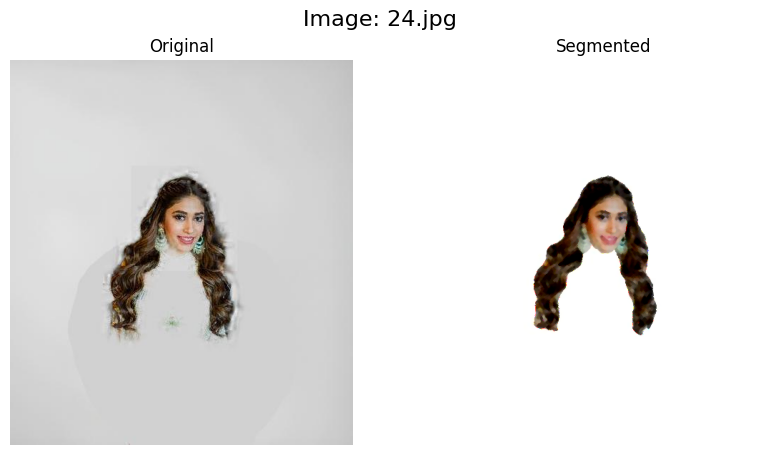

['mouth', 'face', 'hair', 'nose', 'earring', 'eyebrow', 'eye', 'eye', 'ear', 'eye', 'eyebrow', 'earring', 'cheek', 'face'] 
 ____________________________________________________________________________________________________ 



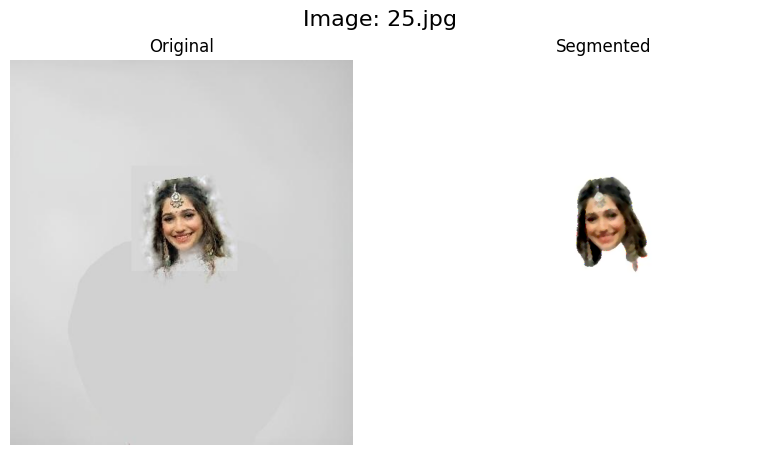

['mouth', 'face', 'eye', 'earring', 'eye', 'nose', 'face', 'hair', 'earring', 'eyebrow', 'cheek'] 
 ____________________________________________________________________________________________________ 



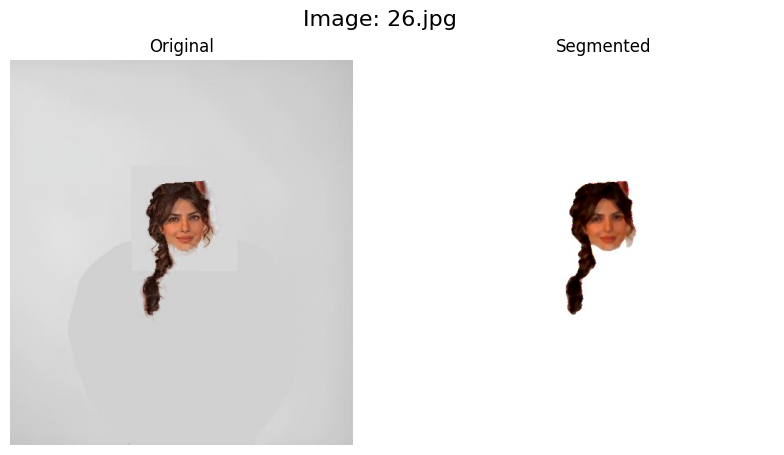

['mouth', 'ear', 'nose', 'eye', 'face', 'eye', 'face', 'face', 'earring', 'earring', 'eyebrow', 'hair', 'eyebrow', 'cheek'] 
 ____________________________________________________________________________________________________ 



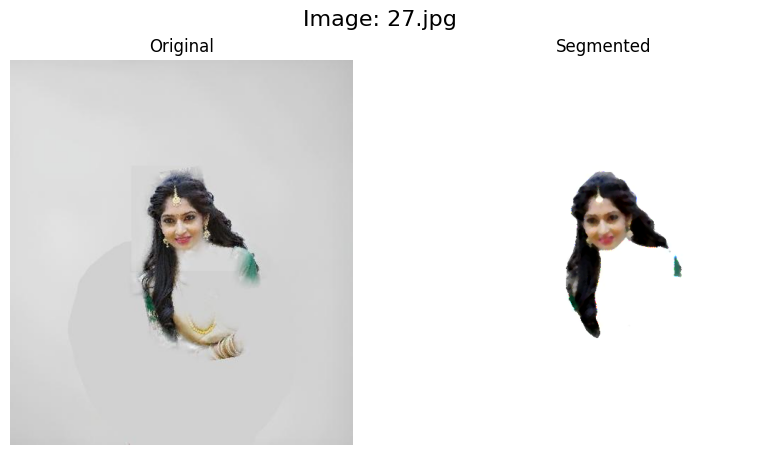

['mouth', 'face', 'nose', 'ear', 'earring', 'eye', 'hair', 'earring', 'eye', 'face', 'eye', 'cheek'] 
 ____________________________________________________________________________________________________ 

	28.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	29.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	30.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	31.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	32.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



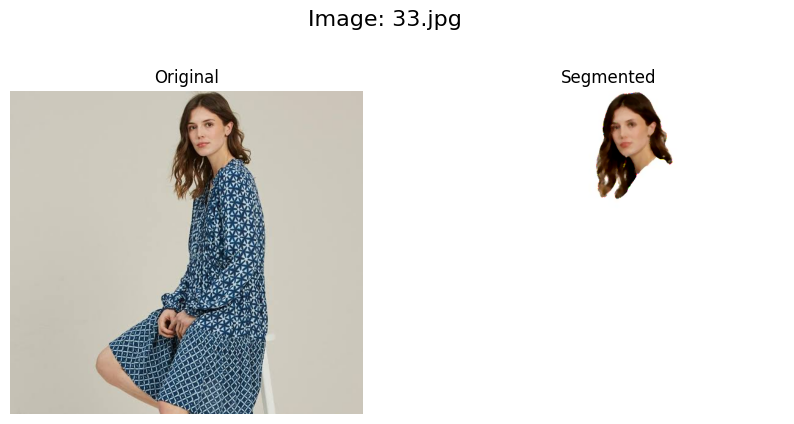

['mouth', 'hair', 'ear', 'eye', 'face', 'nose', 'eye', 'eye', 'cheek', 'earring', 'eyebrow'] 
 ____________________________________________________________________________________________________ 

	34.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	35.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	36.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	37.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



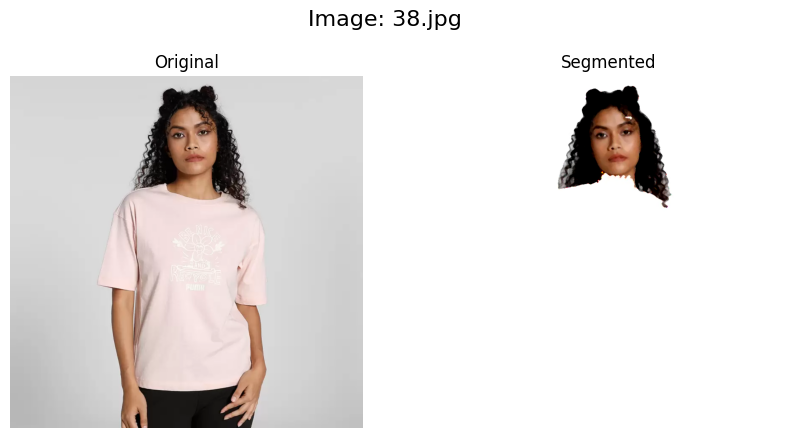

['mouth', 'face', 'hair', 'eye', 'eye', 'eyebrow', 'eyebrow', 'ear', 'nose', 'eyebrow', 'earring', 'eye', 'ear', 'face', 'cheek'] 
 ____________________________________________________________________________________________________ 

	39.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



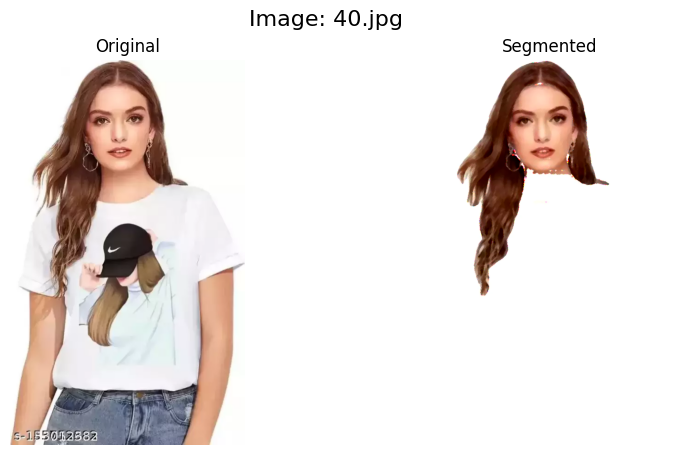

['mouth', 'eyebrow', 'eyebrow', 'eye', 'eye', 'face', 'earring', 'earring', 'ear', 'ear', 'hair', 'nose', 'eyebrow', 'cheek'] 
 ____________________________________________________________________________________________________ 



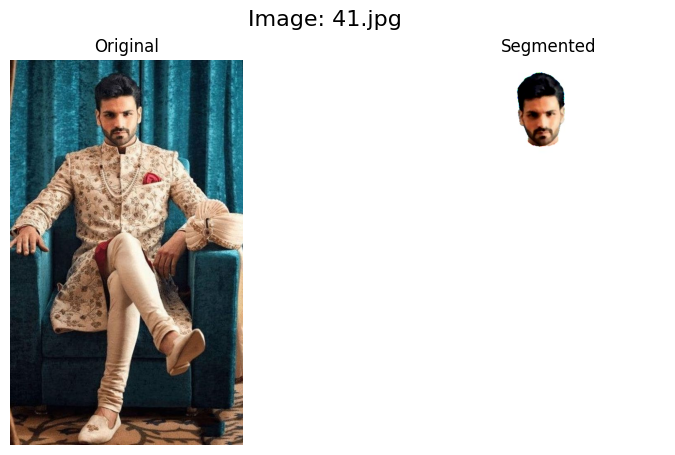

['mouth', 'hair', 'ear', 'ear', 'face', 'nose', 'eye', 'eye', 'cheek'] 
 ____________________________________________________________________________________________________ 

	42.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	43.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	44.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	45.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	46.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



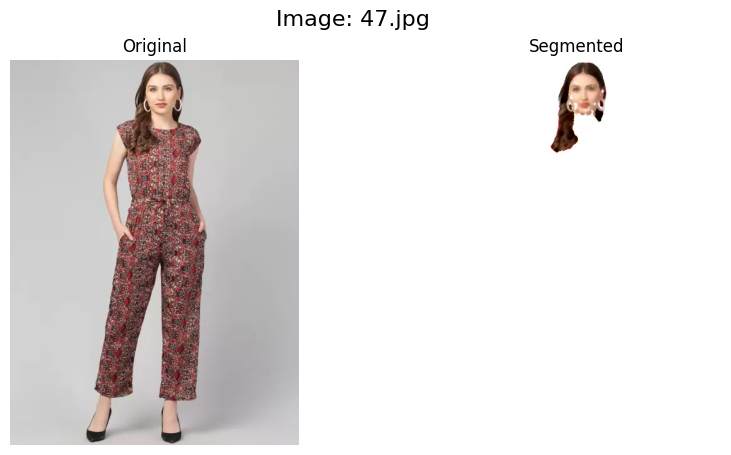

['mouth', 'earring', 'hair', 'earring', 'ear', 'nose', 'face', 'eye', 'eye', 'eye', 'eyebrow', 'cheek', 'eyebrow'] 
 ____________________________________________________________________________________________________ 



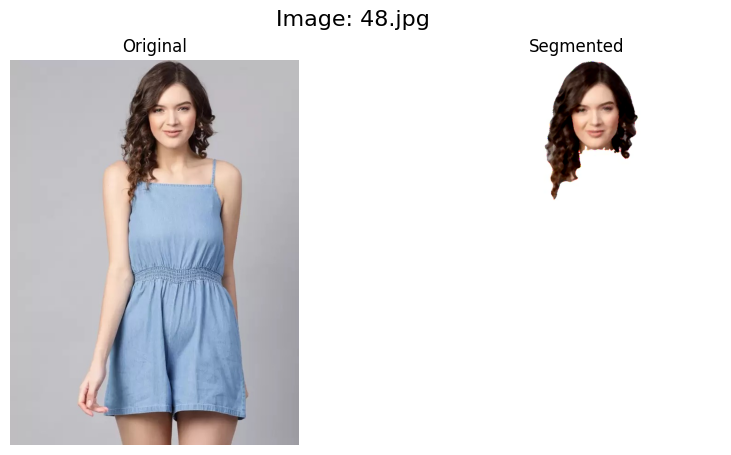

['mouth', 'hair', 'eye', 'eye', 'eyebrow', 'nose', 'eyebrow', 'face', 'cheek', 'face'] 
 ____________________________________________________________________________________________________ 

	49.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



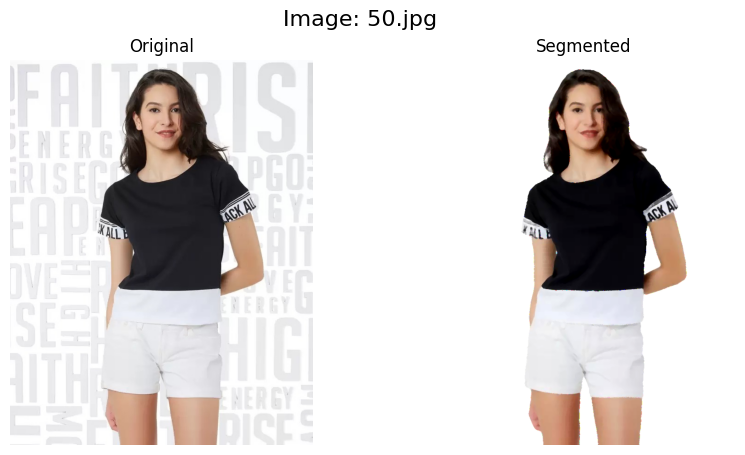

['mouth', 'ear', 'hair', 'face', 'eyebrow', 'eyebrow', 'eye', 'eye', 'nose', 'face', 'cheek', 'face'] 
 ____________________________________________________________________________________________________ 

	51.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



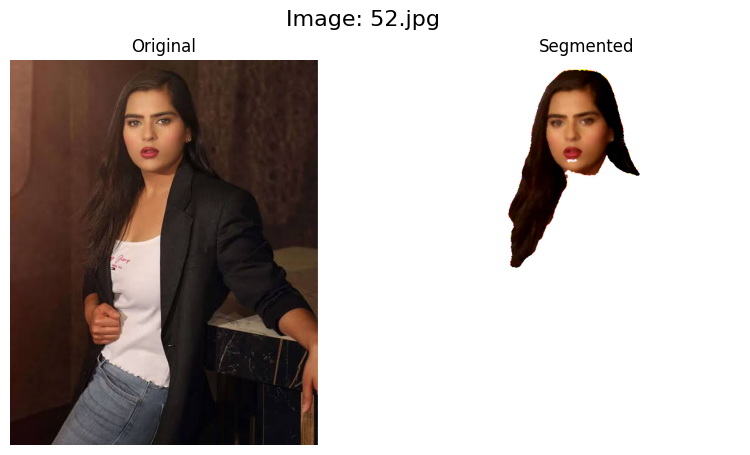

['mouth', 'face', 'ear', 'eyebrow', 'eyebrow', 'eye', 'nose', 'hair', 'eye', 'eyebrow', 'earring', 'cheek', 'face'] 
 ____________________________________________________________________________________________________ 



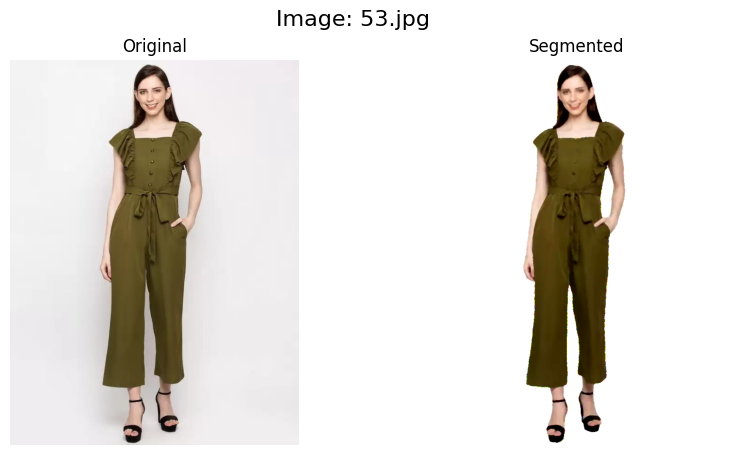

['mouth', 'eye', 'hair', 'eyebrow', 'ear', 'nose', 'face', 'face', 'cheek'] 
 ____________________________________________________________________________________________________ 

	54.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



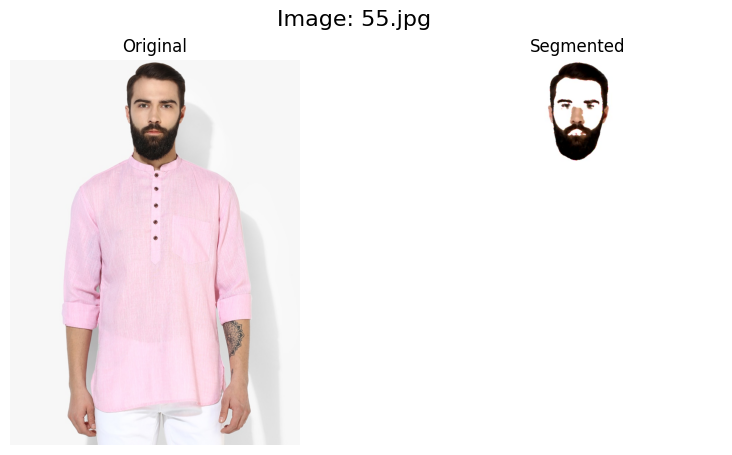

['mouth', 'eye', 'hair', 'face', 'ear', 'ear', 'nose', 'eye', 'eyebrow', 'eyebrow', 'eyebrow', 'cheek'] 
 ____________________________________________________________________________________________________ 

	56.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



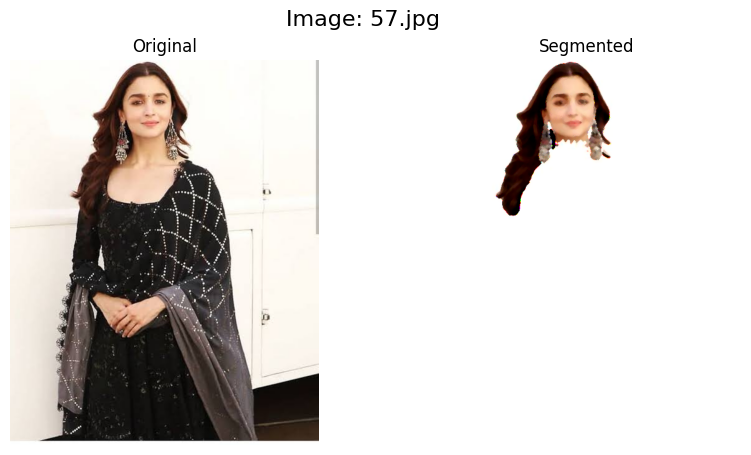

['mouth', 'face', 'earring', 'eyebrow', 'eyebrow', 'hair', 'ear', 'earring', 'nose', 'eye', 'eyebrow', 'eye', 'cheek'] 
 ____________________________________________________________________________________________________ 



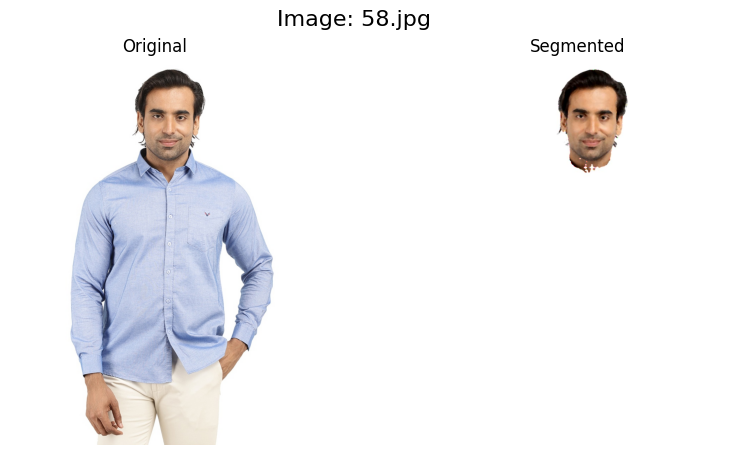

['mouth', 'eyebrow', 'hair', 'ear', 'eye', 'face', 'eyebrow', 'eye', 'nose', 'eyebrow', 'ear', 'cheek', 'face'] 
 ____________________________________________________________________________________________________ 

	59.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	60.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	61.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	62.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	63.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



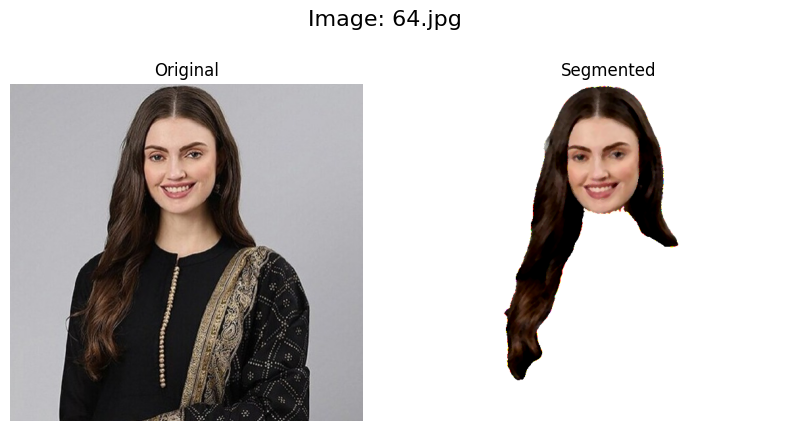

['mouth', 'eyebrow', 'eyebrow', 'nose', 'eye', 'eyebrow', 'eye', 'face', 'earring', 'earring', 'ear', 'hair', 'cheek'] 
 ____________________________________________________________________________________________________ 



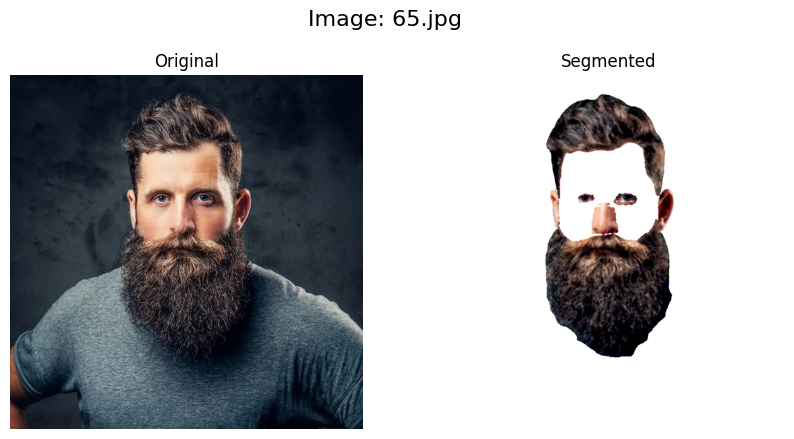

['face', 'hair', 'ear', 'ear', 'eye', 'eye', 'nose', 'eyebrow', 'mouth', 'eye', 'mouth', 'cheek', 'earring'] 
 ____________________________________________________________________________________________________ 

	66.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	67.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	68.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	69.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



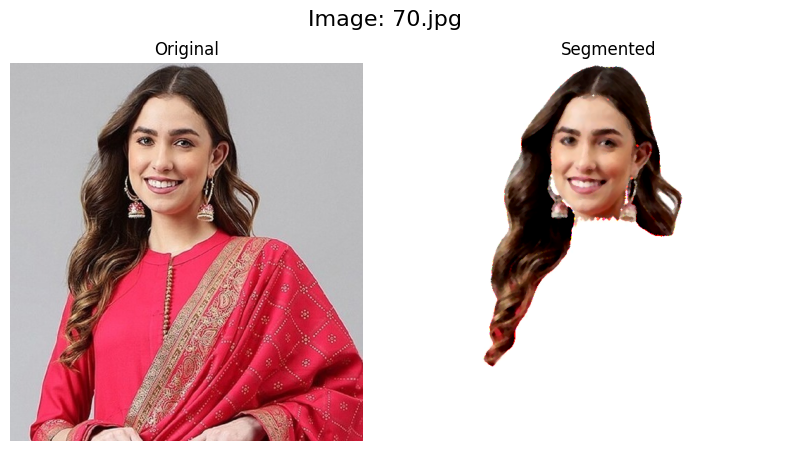

['mouth', 'eyebrow', 'eyebrow', 'eyebrow', 'earring', 'ear', 'eye', 'earring', 'face', 'nose', 'eye', 'hair', 'cheek'] 
 ____________________________________________________________________________________________________ 

	71.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	72.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	73.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	74.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 

	75.jpg: Try Another Image 
 ____________________________________________________________________________________________________ 



In [6]:
for filename in sorted(os.listdir(input_folder)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        input_img = os.path.join(input_folder, filename)
        output_img = os.path.join(output_folder, "new_" + filename)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

        image_pil = Image.open(input_img).convert("RGB")
        processed_image = image_pil

        # Apply morphological operations to remove noise and refine edges before segmentation
        processed_array = np.array(processed_image)
        # processed_array = cv2.morphologyEx(processed_array, cv2.MORPH_OPEN, kernel, iterations=1)
        processed_array = cv2.morphologyEx(processed_array, cv2.MORPH_CLOSE, kernel, iterations=1)
        processed_image = Image.fromarray(processed_array)

        combined_mask, found = Segment(model, processed_image, filename)

        if combined_mask is not None:
            combined_mask_pil = Image.fromarray(np.uint8(combined_mask))
            combined_mask_pil.save(output_img)

            segmented_img = Image.open(output_img).convert("RGB")

            segmented_img_enhanced = segmented_img

            # => Apply enhancements to the segmented image <=
            processed_image = processed_image.filter(ImageFilter.SHARPEN) # Sharpen Image
            segmented_img_enhanced = segmented_img_enhanced.filter(ImageFilter.MedianFilter()) # Remove Noise
            segmented_img_enhanced = ImageEnhance.Contrast(segmented_img_enhanced).enhance(1.15) # Enhance Contrast
            segmented_img_enhanced = ImageOps.autocontrast(segmented_img_enhanced, preserve_tone=True) # Stretch Colors
            segmented_img_enhanced = segmented_img_enhanced.filter(ImageFilter.ModeFilter()) # Apply Smoothing

            # Apply morphological operations to remove noise and refine edges after segmentation
            segmented_array = np.array(segmented_img_enhanced)
            segmented_array = cv2.morphologyEx(segmented_array, cv2.MORPH_CLOSE, kernel, iterations=1)
            segmented_array = cv2.morphologyEx(segmented_array, cv2.MORPH_OPEN, kernel, iterations=1)
            segmented_img_enhanced = Image.fromarray(segmented_array)
        
            Display(np.array(image_pil), np.array(segmented_img_enhanced), filename)
            segmented_img_enhanced.save(output_img)

        print(found, '\n', '_'*100, '\n')